이 대회에 취지에 맞게 코로나 바이러스를 예방하고 확산방지하기 위해. 주제를 생각하고 있다. 1주차엔 이 데이터셋이 어떻게 구성되어 있는지 세세하게 살펴보았다.

In [600]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rc('font',family='NanumGothic')
case=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Case.csv')
time=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Time/Time.csv')
time_age=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Time/TimeAge.csv')
time_gender=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Time/TimeGender.csv')
time_province=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Time/TimeProvince.csv')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy

In [487]:
time.dtypes

date         object
time          int64
test          int64
negative      int64
confirmed     int64
released      int64
deceased      int64
dtype: object

In [488]:
date=time.loc[0]['date']
print(date)
date[5:7]+date[8:]

2020-01-20


'0120'

In [489]:
#def date_to_int(date):
#    return int(date[5:7]+date[8:])
#time['date']=time['date'].apply(date_to_int)
#time.head()

# time

data
- date : 01-20
- time: 16시
- test: 검사자 수
- negative: 결과 검사 음성
- confirmed: 확진자
- released: 완치자
- deceased: 사망자

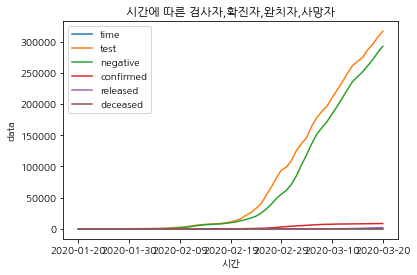

In [543]:
#시간에 따라 시각화
time_01=time.set_index('date')
time_01.plot()
plt.title('시간에 따른 검사자,확진자,완치자,사망자')
plt.xlabel('시간')
plt.ylabel('data')
plt.show()

test숫자와 음성 숫자가 너무 크다

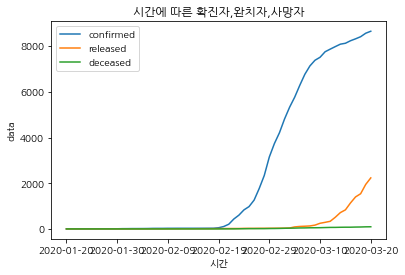

In [491]:
#숫자가 매우큰 test,negative를 제거해줬다.
time_02=time_01.drop(['time','test','negative'],axis=1)
time_02.plot()
plt.title('시간에 따른 확진자,완치자,사망자')
plt.xlabel('시간')
plt.ylabel('data')
plt.show()

# Time age

data
- date: 3월 2일부터 데이터가 있다.
- time: Time 0시
- age: 세대별로 나누었다. 0's~80's
- confirmed:누적 확진자 수
- deceased:누적 사망자 수

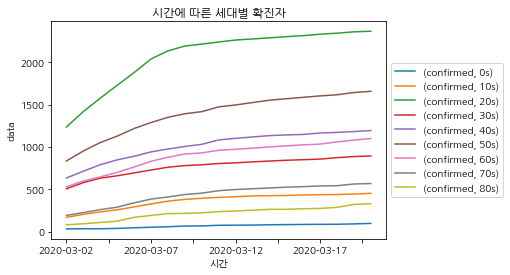

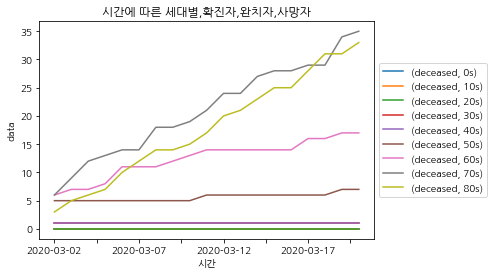

In [547]:
#time_age_01=time_age.set_index(['date','age'])[:9].drop('time',axis=1)
#time_age_02=time_age.set_index(['date','age'])[9:18].drop('time',axis=1)
time_age_confirmed=time_age.drop(['time','deceased'],axis=1).pivot('date','age')
time_age=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Time/TimeAge.csv')
time_age_deceased=time_age.drop(['time','confirmed'],axis=1).pivot('date','age')
# 확진자만 보자
time_age_confirmed.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('시간에 따른 세대별 확진자')
plt.xlabel('시간')
plt.ylabel('data')
plt.show()

#사망자만 보자
time_age_deceased.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('시간에 따른 세대별,확진자,완치자,사망자')
plt.xlabel('시간')
plt.ylabel('data')
plt.show()

- 확진자는 20대가 매우 많다. 20대만 급격하게 감소하는 구간이 있따.궁금한점은 20대와 비슷한 연령대면 10대,30대라 비슷 할줄 알았는데 20대 다음으로 50대,40대,60대 순으로 많아 신기했다.아마 20대의 부모세대가 50대,60대라 그런건지 50대가 가장 활발한 사회활동을 하지만 면역력이 약한건지 이런 저런 생각을 해봐야겠다.
- 사망자는 70대,80대가 확진자도 별로 없는데 압도적인 모습 사망자는 나이순이다. 나이가 많으면 면역력이 약하고 지병이 있을 확률이 높아 그런듯 하다.

# Time gender

data
- date: 3월 2일부터 데이터가 있다.
- time: Time 0시
- gender: 성별로 나누었다. male,female
- confirmed:누적 확진자 수
- deceased:누적 사망자 수

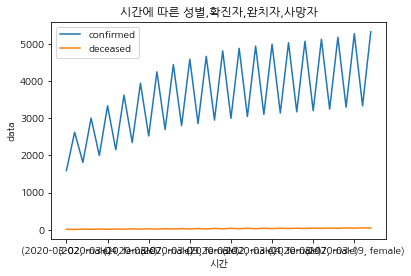

In [493]:
time_gender_01=time_gender.set_index(['date','sex']).drop('time',axis=1)
time_gender_01
time_gender_01.plot()
plt.title('시간에 따른 성별,확진자,완치자,사망자')
plt.xlabel('시간')
plt.ylabel('data')
plt.show()

In [549]:
# 남자만
def drop_female(sex):
    if sex=='female':
        return None
    else:
        return sex
time_gender_male=time_gender[:]
time_gender_male['sex']=time_gender_male['sex'].apply(drop_female)
time_gender_male.dropna(axis=0,inplace=True)
time_gender_male.drop(['time','sex'],axis=1,inplace=True)

In [495]:
time_gender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,None,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,None,3002,12
4,2020-03-04,0,male,1996,20
5,2020-03-04,0,None,3332,12
6,2020-03-05,0,male,2149,21
7,2020-03-05,0,None,3617,14
8,2020-03-06,0,male,2345,25
9,2020-03-06,0,None,3939,17


In [550]:
#여자만
time_gender=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Time/TimeGender.csv')
def drop_male(sex):
    if sex=='male':
        return None
    else:
        return sex
time_gender_female=time_gender[:]
time_gender_female['sex']=time_gender['sex'].apply(drop_male)
time_gender_female.dropna(axis=0,inplace=True)
time_gender_female.drop(['time','sex'],axis=1,inplace=True)

Text(0, 0.5, 'data')

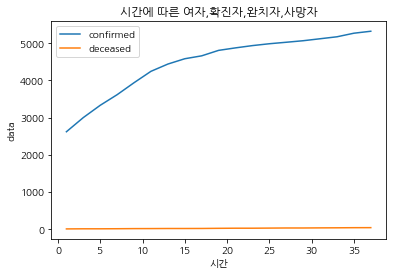

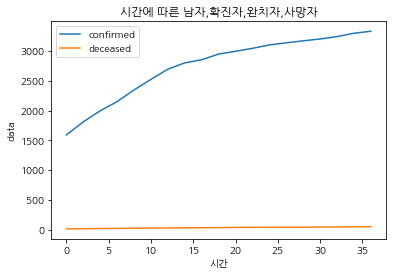

In [553]:

time_gender_female.plot()
plt.title('시간에 따른 여자,확진자,완치자,사망자')
plt.xlabel('시간')
plt.ylabel('data')
time_gender_male.plot()
plt.title('시간에 따른 남자,확진자,완치자,사망자')
plt.xlabel('시간')
plt.ylabel('data')

남자와 여자의 증가 추세는 비슷한 그래프 모양이다. 확진자에 비해 사망자에 현저히 적어 사망자수가 잘 보이지않는다.

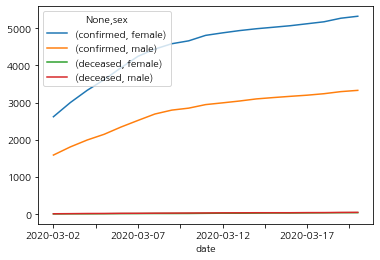

In [555]:
#남자 여자 둘다
time_gender=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Time/TimeGender.csv')
a=time_gender.drop('time',axis=1).pivot('date','sex')
a.plot()

데이터를 보면 여자가 확진자 수가 1~2천명 가량 많지만 사망자 수는 남자가 더 많다.
코로나 바이러스가 남자에게 더 치명적인건지,
남자 확진자가 노인이 더 많아서 그런건지 아니면 다른 이유가 있는지 알아봐야겠다.

# time province

data
- date: 3월 2일부터 데이터가 있다.
- time: Time 0시
- province: 지역별로 나누었다. 특별시,광역시,도 기준
- confirmed:누적 확진자 수
- released:누적 완치자
- deceased:누적 사망자 수

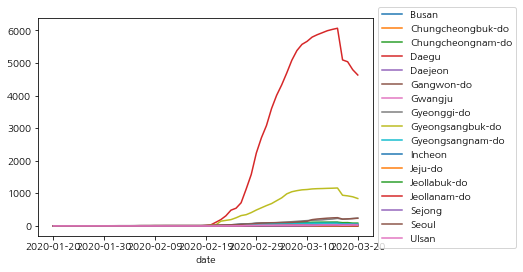

In [558]:
#확진자 시각화
time_province=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Time/TimeProvince.csv')
a=time_province.drop('time',axis=1).pivot('date','province')['confirmed']
a.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

대구가 매우 압도적, 그다음이 경상북도가 많은데 나머지느 잘보이지도 않고 알아보기도 힘들기도 해
일단은 확진자 수가 많은 서울,대구를 제외한 나머지 광역시들은 인접한 도에 합쳤다.

In [560]:
time_province=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Time/TimeProvince.csv')
def convert_province(province):
    if province =='Busan' or province=='Ulsan':
        return 'Gyeongsangnam-do'
    elif province=='Daejeon' or province =='Sejong':
        return 'Chungcheongnam-do'
    elif province=='Incheon':
        return 'Gyeonggi-do'
    elif province=='Gwangju':
        return 'Jeollanam-do'
    else:
        return province
time_province['province']=time_province['province'].apply(convert_province)
time_province.drop('time',axis=1,inplace=True)
time_province

,date,province,confirmed,released,deceased
0,2020-01-20,Seoul,0,0,0
1,2020-01-20,Gyeongsangnam-do,0,0,0
2,2020-01-20,Daegu,0,0,0
3,2020-01-20,Gyeonggi-do,1,0,0
4,2020-01-20,Jeollanam-do,0,0,0
...,...,...,...,...,...
1032,2020-03-20,Jeollabuk-do,3,7,0
1033,2020-03-20,Jeollanam-do,2,3,0
1034,2020-03-20,Gyeongsangbuk-do,841,340,22
1035,2020-03-20,Gyeongsangnam-do,54,33,0


In [501]:
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)

confirmed                                                 \
province   Chungcheongbuk-do Chungcheongnam-do Daegu Gangwon-do Gyeonggi-do   
date                                                                          
2020-01-20                 0                 0     0          0           1   
2020-01-21                 0                 0     0          0           1   
2020-01-22                 0                 0     0          0           1   
2020-01-23                 0                 0     0          0           1   
2020-01-24                 0                 0     0          0           2   
...                      ...               ...   ...        ...         ...   
2020-03-16                31               177  6066         29         261   
2020-03-17                26               158  5094         20         230   
2020-03-18                27               161  5038         21         242   
2020-03-19                28               146  4794         20         254   
2020-03-20                27               145  4631         19         269   

                                                                   \
province   Gyeongsangbuk-do Gyeongsangnam-do Jeju-do Jeollabuk-do   
date                                                                
2020-01-20                0                0       0            0   
2020-01-21                0                0       0            0   
2020-01-22                0                0       0            0   
2020-01-23                0                0       0            0   
2020-01-24                0                0       0            0   
...                     ...              ...     ...          ...   
2020-03-16             1164              220       4            7   
2020-03-17              941              136       2            3   
2020-03-18              922              132       2            4   
2020-03-19              894              132       2            5   
2020-03-20              841              126       2            3   

                         ...          released                               \
province   Jeollanam-do  ... Chungcheongnam-do Daegu Gangwon-do Gyeonggi-do   
date                     ...                                                  
2020-01-20            0  ...                 0     0          0           0   
2020-01-21            0  ...                 0     0          0           0   
2020-01-22            0  ...                 0     0          0           0   
2020-01-23            0  ...                 0     0          0           0   
2020-01-24            0  ...                 0     0          0           0   
...                 ...  ...               ...   ...        ...         ...   
2020-03-16           20  ...                16   734          7          52   
2020-03-17           12  ...                19   947          8          60   
2020-03-18           14  ...                20  1048          8          64   
2020-03-19           12  ...                35  1382          9          70   
2020-03-20           10  ...                37  1577         10          73   

                                                                   \
province   Gyeongsangbuk-do Gyeongsangnam-do Jeju-do Jeollabuk-do   
date                                                                
2020-01-20                0                0       0            0   
2020-01-21                0                0       0            0   
2020-01-22                0                0       0            0   
2020-01-23                0                0       0            0   
2020-01-24                0                0       0            0   
...                     ...              ...     ...          ...   
2020-03-16              178               80       2            4   
2020-03-17              209               84       2            4   
2020-03-18              235               90       2            5   
2020-03-19

만든 데이터로 다시 시각화

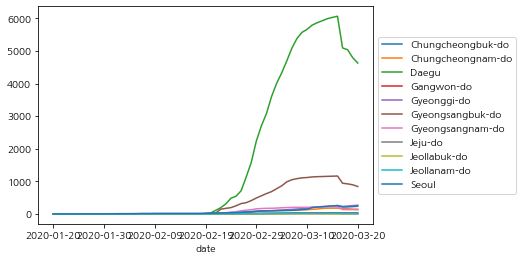

In [561]:
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)['confirmed'].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

합쳐도 대구가 매우 압도적이라 대구를 제외 해보았다.

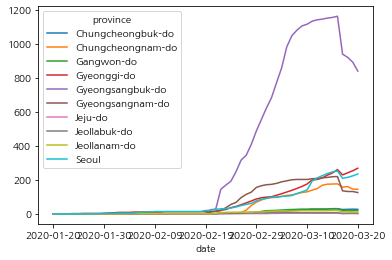

In [562]:
#대구 제외
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)['confirmed'].drop('Daegu',axis=1).plot()

대구를 제외하면 경상북도가 압도적 신기한점은 대구와 그래프 모양이 거의 일치 한다는 점이다. 아마 바로 옆이라 영향이 있을거라 생각이 들었다. 
- 이제 아래 쪽 데이터를 보기위해 경상북도도 제외했다.

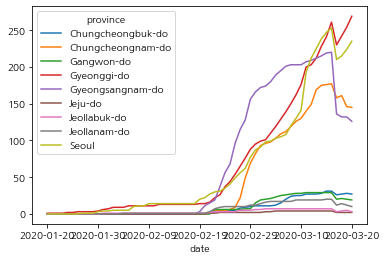

In [564]:
#대구 경상북도 제외
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)['confirmed'].drop(['Daegu','Gyeongsangbuk-do'],axis=1).plot()

경기도의 증가추세가 대구와 경상북도의 확진자 수가 급증한 2월12일의 2일쯤 후부터 급증하기 시작했다.
경상남도의 그래프 모양은 경상북도,대구와 비슷한모습
경기도는 서울과 비슷한모습
강원도 전라남도 충청북도 전라북도 제주도 비슷한모습
충청남도는 경남과 경기도를 섞은듯한 느낌이다.

- 다음은 사망자를 보았다.

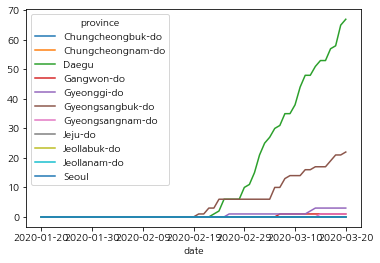

In [565]:
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)['deceased'].plot()

역시나 확진자가 많은 대구와 경상북도가 압도적인 모습
- 아까와 같이 대구와 경북을 없애주자

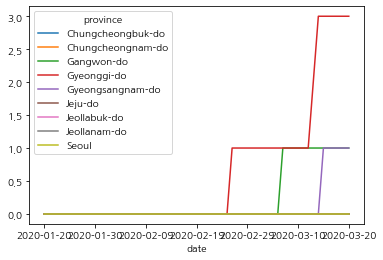

In [566]:
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)['deceased'].drop(['Daegu','Gyeongsangbuk-do'],axis=1).plot()

사망자수가 워낙 적어 의미가 없어보인다.
- 완치자수를 보자 이번엔 바로 대구와 경북은 제외했다.

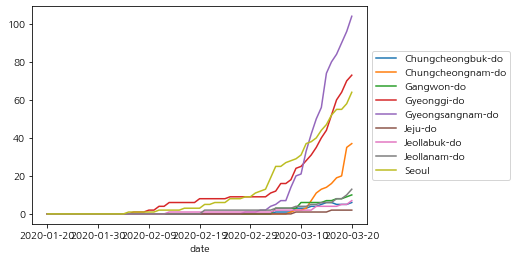

In [567]:
pd.pivot_table(time_province,index='date',columns='province',aggfunc=np.sum)['released'].drop(['Daegu','Gyeongsangbuk-do'],axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

의외로 경상남도가 가장 완치자가 많은 모습 나머지는 확진자 수와 비슷한데 확진자 수 그래프와는 달리 완치자 수 그래프는 모야이 비슷비슷하다

In [585]:
time_province=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Time/TimeProvince.csv')
pd.pivot_table(time_province,index='date',columns='province')['confirmed']

province,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan
date,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-16,107,31,115,6066,22,29,16,231,1164,85,30,4,7,4,40,253,28
2020-03-17,52,26,100,5094,18,20,10,204,941,64,26,2,3,2,40,210,20
2020-03-18,48,27,102,5038,18,21,11,215,922,63,27,2,4,3,41,215,21


각 지역 확진자 수 끼리의 연관성을 알아보자

In [578]:
pd.pivot_table(time_province,index='date',columns='province')['confirmed'].corr()

province,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan
province,,,,,,,,,,,,,,,,,
Busan,1.000000,0.857431,0.918315,0.916211,0.948248,0.942243,0.966780,0.834352,0.941709,0.982701,0.705639,0.969375,0.978093,0.963565,0.476850,0.814529,0.944259
Chungcheongbuk-do,0.857431,1.000000,0.960482,0.975313,0.960769,0.948866,0.894779,0.987752,0.969502,0.926833,0.937726,0.874432,0.835773,0.844789,0.810301,0.977675,0.948849
Chungcheongnam-do,0.918315,0.960482,1.000000,0.994138,0.982741,0.980948,0.909707,0.948674,0.985491,0.967656,0.874365,0.906967,0.899351,0.937803,0.693158,0.933796,0.984007
Daegu,0.916211,0.975313,0.994138,1.000000,0.982679,0.988116,0.924318,0.959361,0.995098,0.968158,0.883557,0.924018,0.898649,0.922685,0.707865,0.942676,0.979648
Daejeon,0.948248,0.960769,0.982741,0.982679,1.000000,0.973283,0.945822,0.954028,0.987404,0.986101,0.862831,0.934210,0.929489,0.932542,0.693410,0.935658,0.992542
Gangwon-do,0.942243,0.948866,0.980948,0.988116,0.973283,1.000000,0.951761,0.925647,0.992844,0.975610,0.836092,0.956976,0.933387,0.952505,0.637262,0.909843,0.969955
Gwangju,0.966780,0.894779,0.909707,0.924318,0.945822,0.951761,1.000000,0.875441,0.953275,0.969058,0.761445,0.984582,0.966111,0.927827,0.562717,0.860698,0.928063
Gyeonggi-do,0.834352,0.987752,0.948674,0.959361,0.954028,0.925647,0.875441,1.000000,0.950305,0.908200,0.952987,0.843182,0.815093,0.825718,0.849398,0.988820,0.946463
Gyeongsangbuk-do,0.941709,0.969502,0.985491,0.995098,0.987404,0.992844,0.953275,0.950305,1.000000,0.982939,0.860195,0.952342,0.925105,0.934057,0.675022,0.930927,0.979863


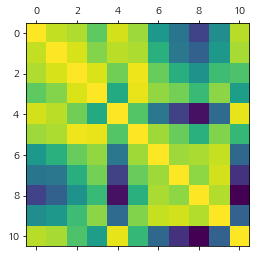

In [572]:
plt.matshow(pd.pivot_table(time_province,index='date',columns='province')['confirmed'].corr())

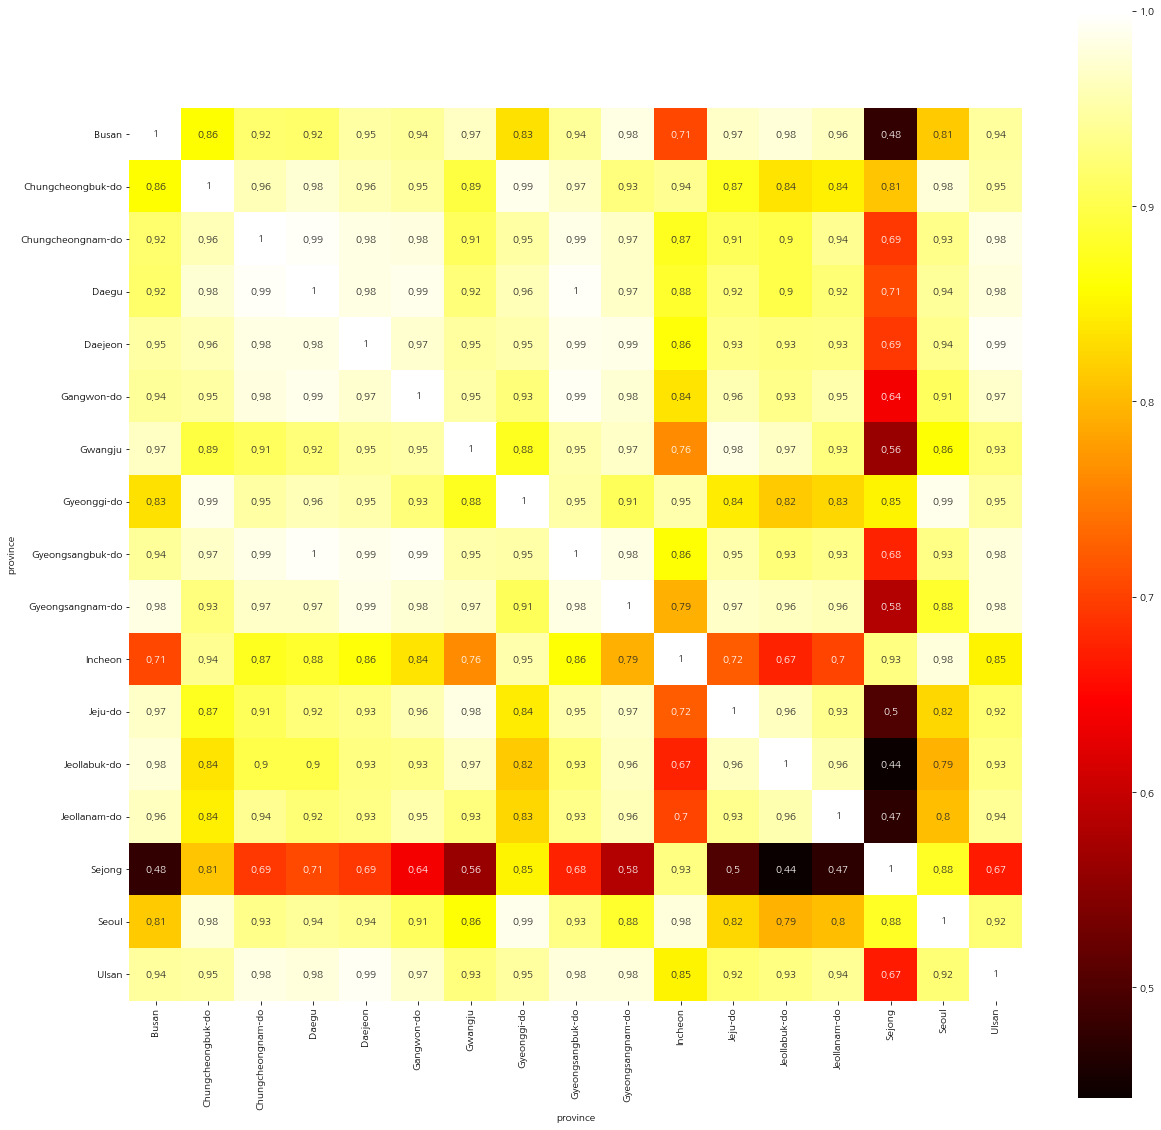

In [580]:
corr=pd.pivot_table(time_province,index='date',columns='province')['confirmed'].corr()
plt.figure(figsize=(20,20))
df_heatmap=sns.heatmap(corr,cbar=True,annot=True,
                     annot_kws={'size':10},square=True,cmap='hot')

색이 옅을수록 연관성이 깊고 색이 진할수록 연관성이 없다는 뜻이다. 생각보다 다들 연관성이 엄청 높은 모습
세종시와 그나마 인천시만이 연관성이 많이 없다.
세종시는 인구가 적어 그런가 싶기도 하다. 이 정보를 각 지역간 교통량? 밀접함 으로 이용할 수 있을까?
일단은 데이터가 너무 정리가 안되어있어 힘들것 같다.
- 묶은 지역으로도 해보자

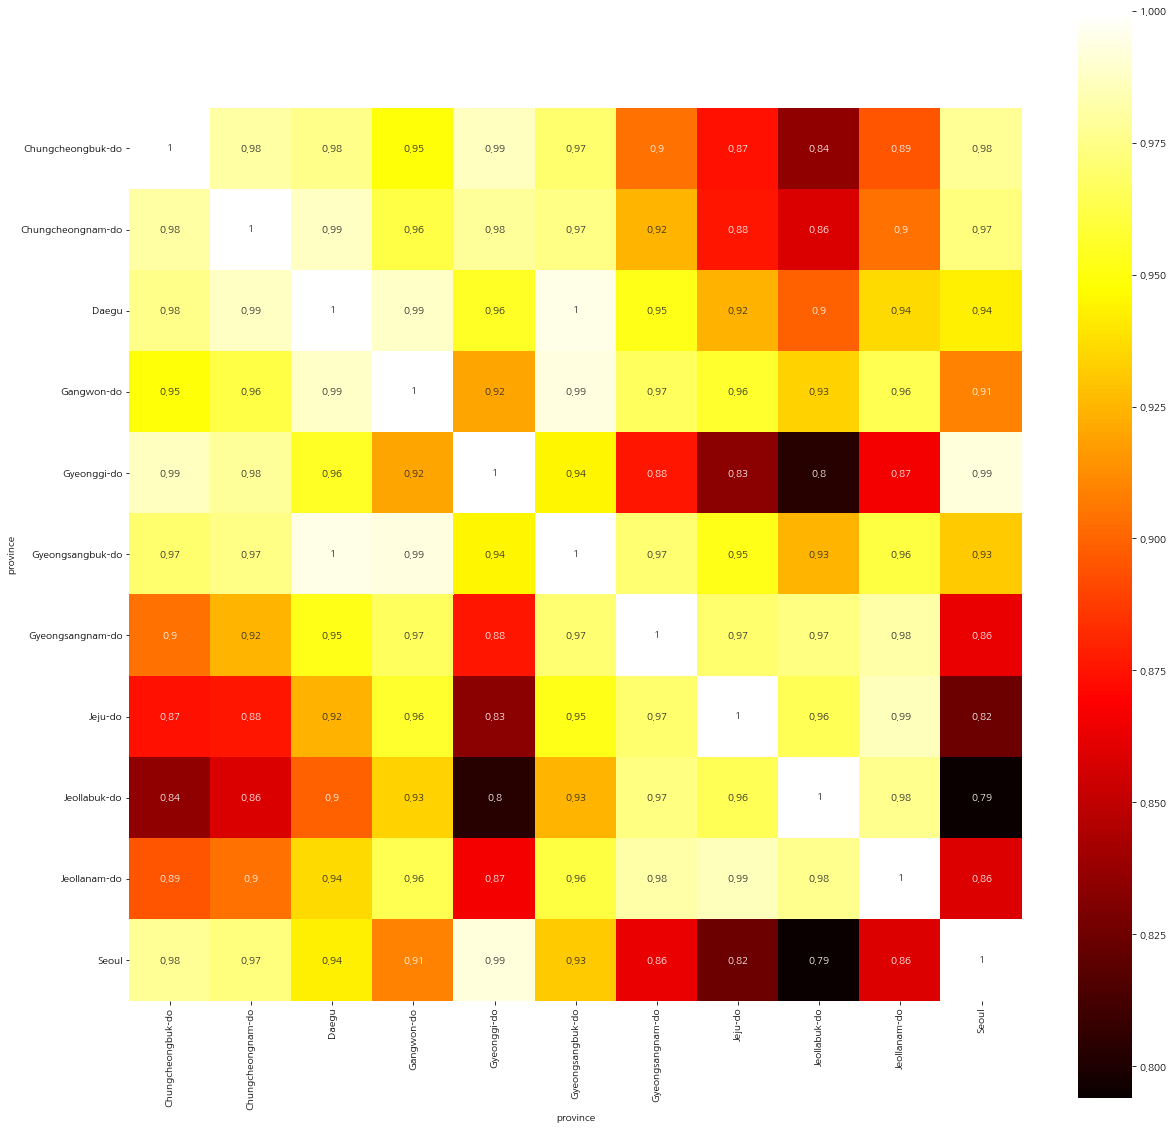

In [586]:
time_province['province']=time_province['province'].apply(convert_province)
#time_province.drop('time',axis=1,inplace=True)
corr=pd.pivot_table(time_province,index='date',columns='province')['confirmed'].corr()
plt.figure(figsize=(20,20))
df_heatmap=sns.heatmap(corr,cbar=True,annot=True,
                     annot_kws={'size':10},square=True,cmap='hot')

여기서는 전라북도가 타지여고가 연관이 적은 모습 의외인 것은 강원도,대구 가 모든지역과 연관이 높다는 점?
혹시 단순한 확진자 수가 아닌 비율로 따져 보면 달라질까 해 각도시별 인구수를 가져왔다.

In [587]:
time_province=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Time/TimeProvince.csv')
a=10**4
num_citizen={'Seoul':977*a,'Busan':352*a,'Chungcheongbuk-do':157*a,'Chungcheongnam-do':206*a
            ,'Daegu':246*a,'Daejeon':153*a,'Gangwon-do':156*a,'Gwangju':150*a
            ,'Gyeonggi-do':1353*a,'Gyeongsangbuk-do':270*a,'Gyeongsangnam-do':344*a,'Incheon':292*a
            ,'Jeju-do':60*a,'Jeollabuk-do':187*a,'Jeollanam-do':190*a,'Sejong':27*a
            ,'Ulsan':116*a}
def con(a):
    return num_citizen[a]
time_province['num_of_citizen']=time_province['province'].apply(con)
time_province['ratio_of_confirmed']=time_province['confirmed']/time_province['num_of_citizen']
time_province.drop('time',axis=1,inplace=True)
time_province[['ratio_of_confirmed']]

,ratio_of_confirmed
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,3.424658e-07
4,0.000000e+00
...,...
1032,1.604278e-06
1033,1.052632e-06
1034,3.114815e-04
1035,1.569767e-05


In [516]:
pd.pivot_table(time_province,index='date',columns='province')['ratio_of_confirmed']

province,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan
date,,,,,,,,,,,,,,,,,
2020-01-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.424658e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.424658e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.424658e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.424658e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.390983e-08,0.000000,0.000000,3.424658e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-16,0.000030,0.000020,0.000056,0.002466,0.000014,0.000019,0.000011,1.707317e-05,0.000431,0.000025,1.027397e-05,0.000007,0.000004,0.000002,0.000148,0.000026,0.000024
2020-03-17,0.000015,0.000017,0.000049,0.002071,0.000012,0.000013,0.000007,1.507761e-05,0.000349,0.000019,8.904110e-06,0.000003,0.000002,0.000001,0.000148,0.000021,0.000017
2020-03-18,0.000014,0.000017,0.000050,0.002048,0.000012,0.000013,0.000007,1.589061e-05,0.000341,0.000018,9.246575e-06,0.000003,0.000002,0.000002,0.000152,0.000022,0.000018


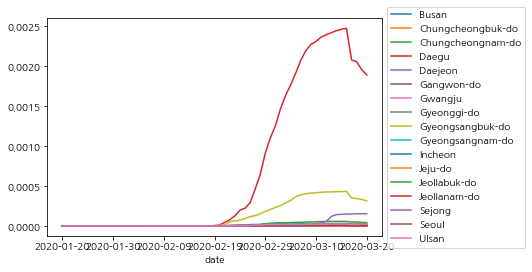

In [588]:
pd.pivot_table(time_province,index='date',columns='province')['ratio_of_confirmed'].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

비율로 따져도 크게 달라지는 건 없지만 눈에 띄는건 세종시가 상당히 높아진점이다.

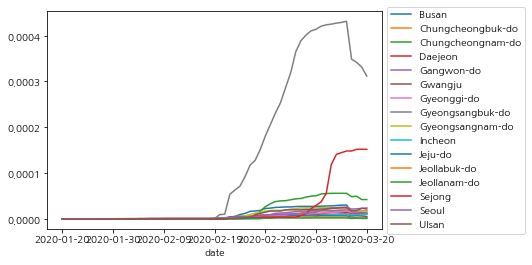

In [589]:
pd.pivot_table(time_province,index='date',columns='province')['ratio_of_confirmed'].drop('Daegu',axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

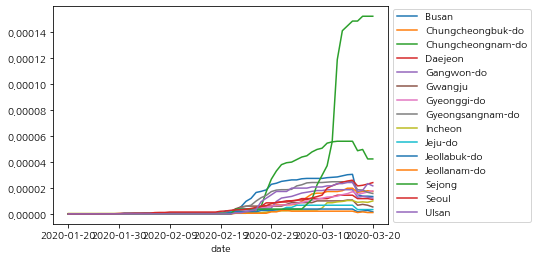

In [593]:
pd.pivot_table(time_province,index='date',columns='province')['ratio_of_confirmed'].drop(['Daegu','Gyeongsangbuk-do'],axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

세종시와 충남이 가장 높은 모습 서울과 경기도는 인구수에 비하면 확진자가 적은 편이였다.

In [598]:
pd.pivot_table(time_province,index='date',columns='province')['ratio_of_confirmed'].corr()

province,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan
province,,,,,,,,,,,,,,,,,
Busan,1.000000,0.857431,0.918315,0.916211,0.948248,0.942243,0.966780,0.834352,0.941709,0.982701,0.705639,0.969375,0.978093,0.963565,0.476850,0.814529,0.944259
Chungcheongbuk-do,0.857431,1.000000,0.960482,0.975313,0.960769,0.948866,0.894779,0.987752,0.969502,0.926833,0.937726,0.874432,0.835773,0.844789,0.810301,0.977675,0.948849
Chungcheongnam-do,0.918315,0.960482,1.000000,0.994138,0.982741,0.980948,0.909707,0.948674,0.985491,0.967656,0.874365,0.906967,0.899351,0.937803,0.693158,0.933796,0.984007
Daegu,0.916211,0.975313,0.994138,1.000000,0.982679,0.988116,0.924318,0.959361,0.995098,0.968158,0.883557,0.924018,0.898649,0.922685,0.707865,0.942676,0.979648
Daejeon,0.948248,0.960769,0.982741,0.982679,1.000000,0.973283,0.945822,0.954028,0.987404,0.986101,0.862831,0.934210,0.929489,0.932542,0.693410,0.935658,0.992542
Gangwon-do,0.942243,0.948866,0.980948,0.988116,0.973283,1.000000,0.951761,0.925647,0.992844,0.975610,0.836092,0.956976,0.933387,0.952505,0.637262,0.909843,0.969955
Gwangju,0.966780,0.894779,0.909707,0.924318,0.945822,0.951761,1.000000,0.875441,0.953275,0.969058,0.761445,0.984582,0.966111,0.927827,0.562717,0.860698,0.928063
Gyeonggi-do,0.834352,0.987752,0.948674,0.959361,0.954028,0.925647,0.875441,1.000000,0.950305,0.908200,0.952987,0.843182,0.815093,0.825718,0.849398,0.988820,0.946463
Gyeongsangbuk-do,0.941709,0.969502,0.985491,0.995098,0.987404,0.992844,0.953275,0.950305,1.000000,0.982939,0.860195,0.952342,0.925105,0.934057,0.675022,0.930927,0.979863


연관성을 해보았는데 수치가 confirmed와 완전 똑같이 나왔다.. 왜그런지를 모르겠다.
인구수에 비해 확진자수가 적어서 그런가 함수를 잘못 이해한건지.. 한번 알아봐야겠다.

In [522]:
pd.pivot_table(time_province,index='date',columns='province')['released'].corr()

province,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan
province,,,,,,,,,,,,,,,,,
Busan,1.000000,0.965940,0.897089,0.911165,0.986011,0.941154,0.843517,0.965084,0.967233,0.961554,0.920468,0.957049,0.913744,0.969213,NaN,0.924577,0.977382
Chungcheongbuk-do,0.965940,1.000000,0.813673,0.821044,0.968455,0.969812,0.840554,0.943434,0.927406,0.938561,0.921369,0.949940,0.908222,0.956672,NaN,0.949640,0.921213
Chungcheongnam-do,0.897089,0.813673,1.000000,0.985812,0.865895,0.831603,0.830467,0.903626,0.959560,0.940928,0.858658,0.869287,0.859301,0.927048,NaN,0.806118,0.949343
Daegu,0.911165,0.821044,0.985812,1.000000,0.872025,0.839977,0.833860,0.920508,0.969621,0.952221,0.858699,0.895090,0.866298,0.925241,NaN,0.819429,0.969745
Daejeon,0.986011,0.968455,0.865895,0.872025,1.000000,0.937605,0.831836,0.944550,0.945670,0.937646,0.913267,0.938276,0.915446,0.958046,NaN,0.917637,0.948242
Gangwon-do,0.941154,0.969812,0.831603,0.839977,0.937605,1.000000,0.886328,0.953092,0.939118,0.955424,0.948648,0.939157,0.923044,0.936621,NaN,0.971251,0.917666
Gwangju,0.843517,0.840554,0.830467,0.833860,0.831836,0.886328,1.000000,0.931295,0.893158,0.901324,0.928891,0.833037,0.942406,0.848841,NaN,0.937241,0.863698
Gyeonggi-do,0.965084,0.943434,0.903626,0.920508,0.944550,0.953092,0.931295,1.000000,0.973671,0.979533,0.966076,0.956571,0.966596,0.958775,NaN,0.966234,0.966475
Gyeongsangbuk-do,0.967233,0.927406,0.959560,0.969621,0.945670,0.939118,0.893158,0.973671,1.000000,0.991408,0.933037,0.945875,0.935311,0.972797,NaN,0.920245,0.991987


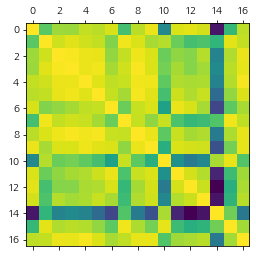

In [523]:
plt.matshow(pd.pivot_table(time_province,index='date',columns='province')['ratio_of_confirmed'].corr())

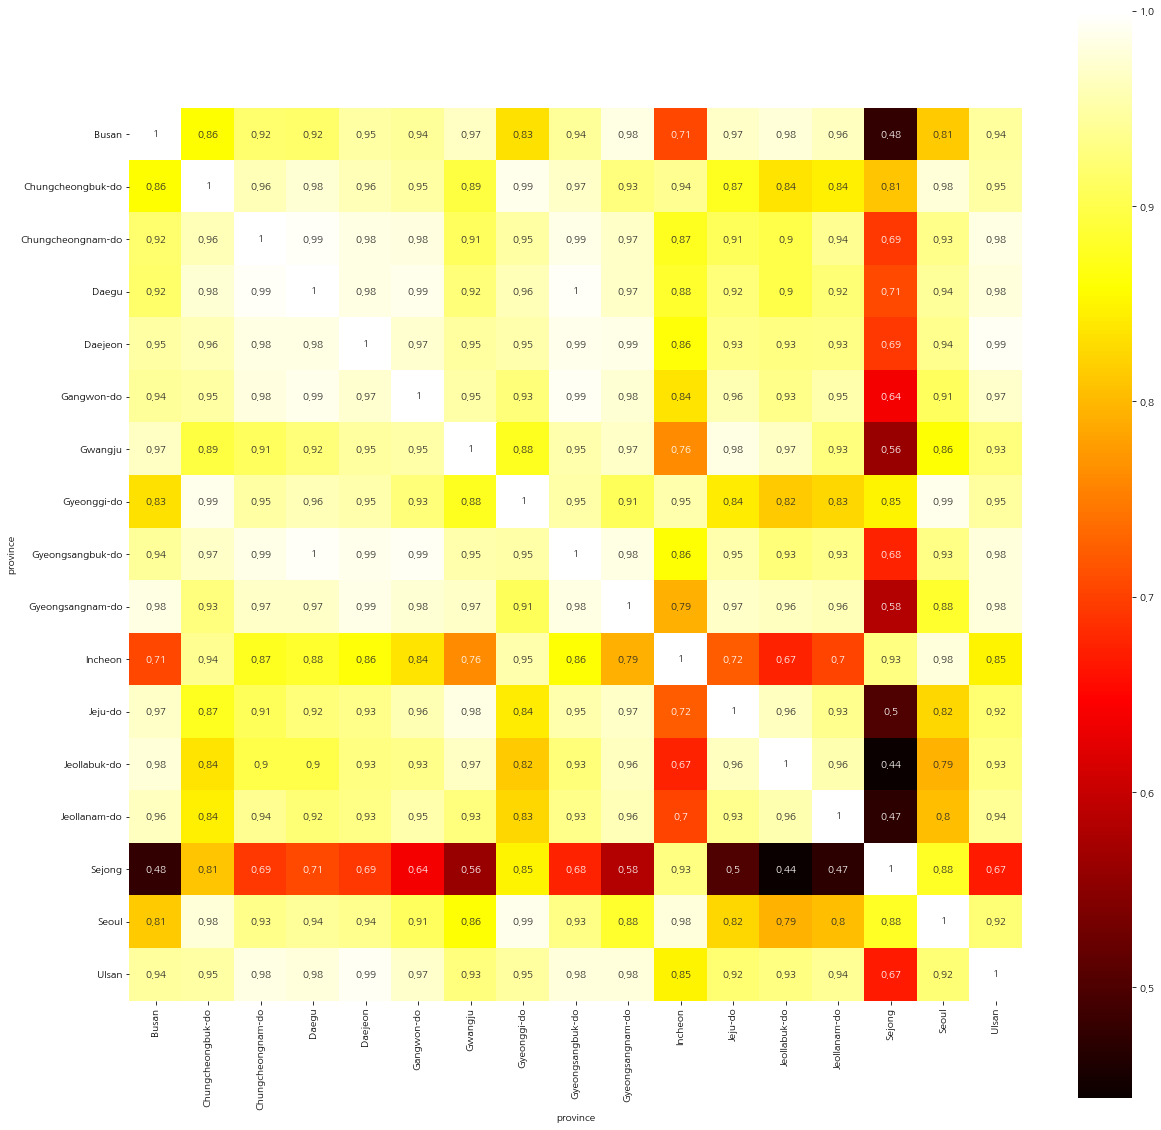

In [529]:
corr=pd.pivot_table(time_province,index='date',columns='province')['confirmed'].corr()
plt.figure(figsize=(20,20))
df_heatmap=sns.heatmap(corr,cbar=True,annot=True,
                     annot_kws={'size':10},square=True,cmap='hot')

# Region

- code: 지역 코드
- province: 특별시, 광역시, 도 까지지의 정보
- city: 시,군,구 까지의 정보 
- latitude: the latitude of the visit (WGS84):위도
- longitude: the longitude of the visit (WGS84):경도:
- elementary_school_count: 지역의 초등학교 수
- kindergarten_count:지역의 유치원 수
- university_count:지역의 대학교
- academy_ratio: the ratio of academies 지역의 학원 비율?
- elderly_population_ratio:노인 인구 비율
- elderly_alone_ratio:독거노인 비율
- nursing_home_count: 지역의 요양병원 수

일단은 timeprovince처럼 지역을 다묶었다.

In [599]:
region=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Region.csv')
time_province=pd.read_csv('Data-Science-for-COVID-19-old-master/dataset/Time/TimeProvince.csv')
region.drop(['code','latitude','longitude'],axis=1,inplace=True)
#region=region.loc[[0,26,43,52,58,69,75,81,82,114,133,147,161,176,199,223,242]]
a=list(set(time_province['province'].values))
def con_city(city):
    if '_all' in city:
        if city=='Gangwon_all':
            return (city[:len(city)-4]+'-do')
        else:
            return (city[:len(city)-4])
    else:
        return (city)
region['city']=region['city'].apply(con_city)
#region['city']=region['city'].apply(convert_province)
region=region.set_index('city').loc[a]

In [525]:
region.drop('province',axis=1,inplace=True)

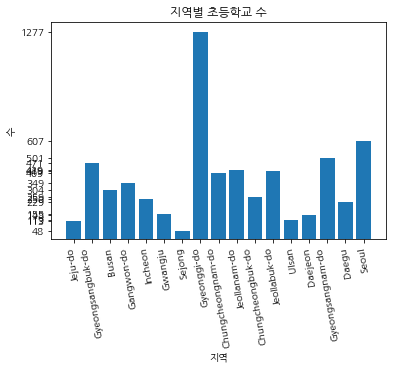

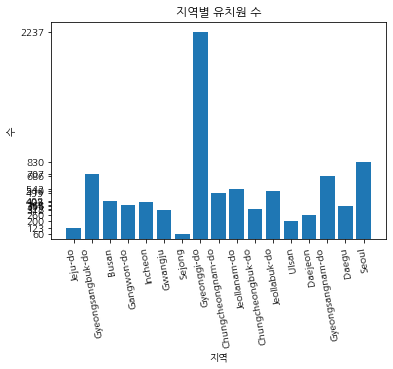

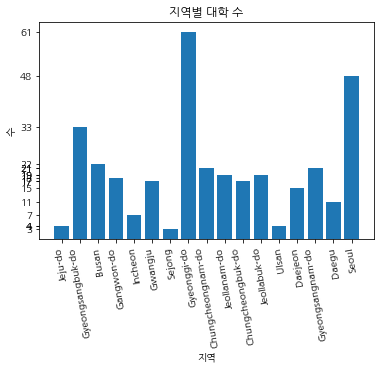

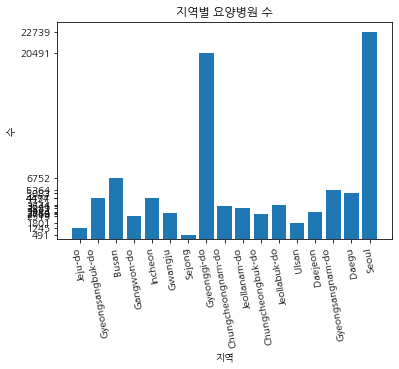

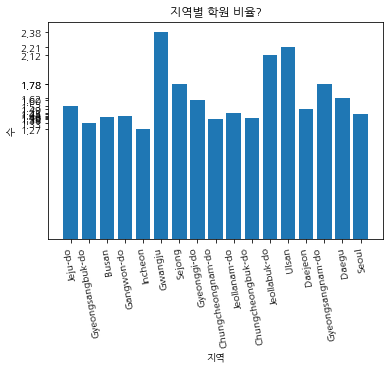

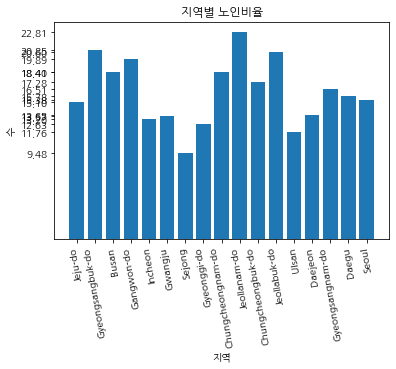

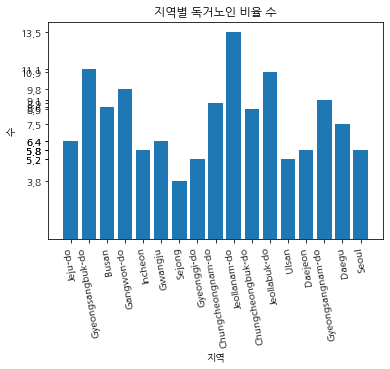

In [526]:
x=region.index
y1=region['elementary_school_count']
y2=region['kindergarten_count']
y3=region['university_count']
y4=region['nursing_home_count']

y5=region['academy_ratio']
y6=region['elderly_population_ratio']
y7=region['elderly_alone_ratio']

xlabel=x
plt.title('지역별 초등학교 수')
plt.bar(x,y1)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y1)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

plt.title('지역별 유치원 수')
plt.bar(x,y2)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y2)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

xlabel=x
plt.title('지역별 대학 수')
plt.bar(x,y3)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y3)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

xlabel=x
plt.title('지역별 요양병원 수')
plt.bar(x,y4)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y4)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

xlabel=x
plt.title('지역별 학원 비율?')
plt.bar(x,y5)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y5)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

xlabel=x
plt.title('지역별 노인비율')
plt.bar(x,y6)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y6)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

xlabel=x
plt.title('지역별 독거노인 비율 수')
plt.bar(x,y7)
plt.xticks(x,xlabel,rotation=100)
plt.yticks(y7)
plt.xlabel('지역')
plt.ylabel('수')
plt.show()

이걸로 공공기관 수와 확진자 사이의 수,노인 인구비율과 사망자,확진자 수를 비교하면 좋을 것 같다.
time_province와 다르게 시/군/구 까지 지역 위치가 있어 나중에 특정 지역을 분석할 때 유용할듯
나이대 별 감염자 수 차이가 기 때문에 그 지역의 세대별 인구와 연관지어 할 수 있을듯?
일단 나는 time_povince와 연계를 위해 time_province 지역 리스트로 묶어서 해보고 있다.
지역별로 값이 차이가 있어(특히 경기도) 인구별로 나눠볼까  면적으로 나눠볼까 고민중 이다.